In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from utils import load_checkpoint, cnn_test_step, mmnn_test_step
import pandas as pd
from dataloader import CustomDataloader
from networks import CNNRegression, MultiModalNetwork
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




# Model 1 - Linear Regression Analysis

#### Load Trained Model 1 Into Notebook

In [2]:
regression_theta = torch.load('tensor_collection\\lr_theta.pt').numpy()
regression_train_loss = torch.load('tensor_collection\\lr_train_losses.pt')
regression_val_loss = torch.load('tensor_collection\\lr_val_losses.pt')



#### Load Test Set Data

In [3]:
cm_x_test = torch.load('tensor_collection\\lr_x_test.pt')
cm_y_test = torch.load('tensor_collection\\lr_y_test.pt')

#### Plot Training and Validation Losses (MSE)

Final training loss: 73.94129180908203
Final validation loss: 80.25271606445312


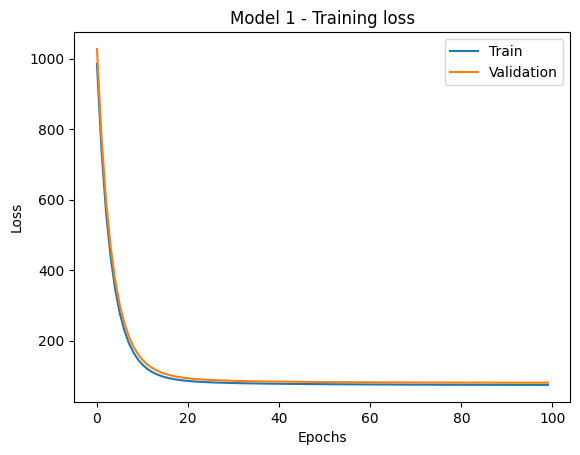

In [4]:
plt.figure(0)
plt.plot(regression_train_loss)
plt.plot(regression_val_loss)
plt.title('Model 1 - Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

print('Final training loss:', regression_train_loss[-1].item())
print('Final validation loss:', regression_val_loss[-1].item())

#### Model 1 Predict on Test set

In [5]:
cm_y_hat = cm_x_test @ regression_theta

#### True V.S. Predicted Graph (Per iteration)

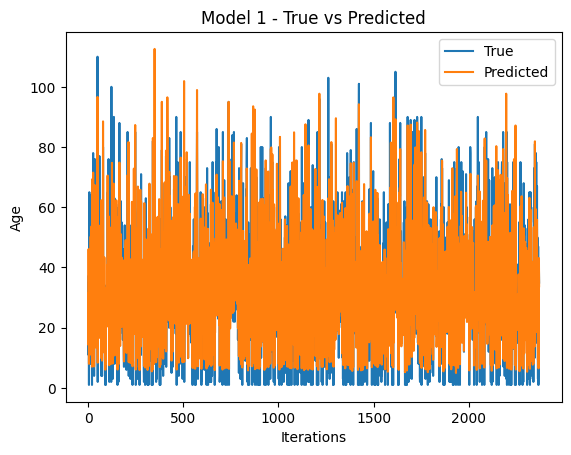

In [6]:
plt.figure(1)
plt.plot(cm_y_test)
plt.plot(cm_y_hat)
plt.title('Model 1 - True vs Predicted')
plt.xlabel('Iterations')
plt.ylabel('Age')
plt.legend(['True', 'Predicted'])

#### Numerical Metric Evaluation Scores (MSE, RMSE, MAE, R^2)

In [7]:

predictions = np.array(cm_y_hat)
actuals = np.array(cm_y_test)

mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'Linear Regression MSE: {mse}')
print(f'Linear Regression RMSE: {rmse}')
print(f'Linear Regression MAE: {mae}')
print(f'Linear Regression R-Squared: {r2}')


Linear Regression MSE: 72.65914529297598
Linear Regression RMSE: 8.524033393469079
Linear Regression MAE: 6.362054293401746
Linear Regression R-Squared: 0.8098723245291708


#### Residual Plot on test set

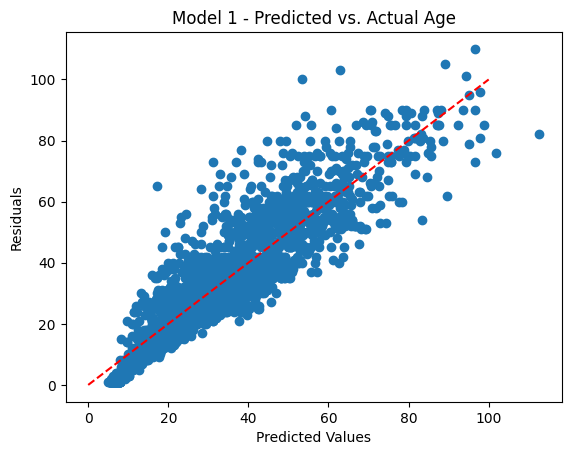

In [8]:
plt.figure(2)
plt.scatter(cm_y_hat, cm_y_test)
plt.title('Model 1 - Predicted vs. Actual Age')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.show()

#### Residuals Histogram Plot

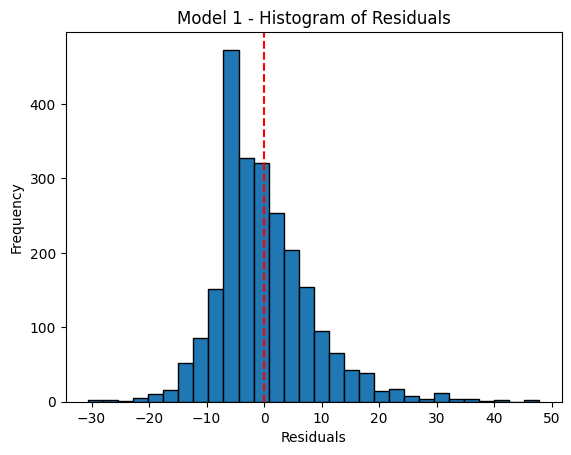

In [9]:
residuals = cm_y_test - cm_y_hat

plt.figure(3)
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Model 1 - Histogram of Residuals')
plt.axvline(x=0, color='red', linestyle='--')  # Add a line at x=0 for reference
plt.show()

# Model 2 - Convolutional Neural Network Analysis

#### Load Model 2 Train and Test Loss Data

In [10]:
cnn_train_loss = torch.load('tensor_collection\\cnn_train_losses.pt')
cnn_val_loss = torch.load('tensor_collection\\cnn_val_losses.pt')


#### Load Test Set Data

In [11]:
directory = 'tensor_collection\\'

cnn_x_test = pd.read_csv(directory + 'cnn_x_test.csv')
cnn_y_test_tensor = torch.load(directory + 'cnn_y_test.pt')

print(type(cnn_x_test))
print(type(cnn_y_test_tensor))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


#### Load Trained Model 2 Into Notebook

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_cnn = CNNRegression().to(device)

model_cnn, epochs = load_checkpoint('model_checkpoints\\cnn_checkpoint_final.pth', model_cnn)

batch_sz = 64

#### Setup Test Dataloader for CNN

In [13]:
test_cnn_dataloader = CustomDataloader(dataframe=cnn_x_test, age=cnn_y_test_tensor, batch_size=batch_sz, randomize=False)

#### Model Predict on Test set

In [14]:
model_cnn.eval()  

predictions_cnn = []
actuals_cnn = []

predictions_cnn, actuals_cnn = cnn_test_step(model_cnn, test_cnn_dataloader, device)


#### Plotting Training and Validation Loss (iterations)

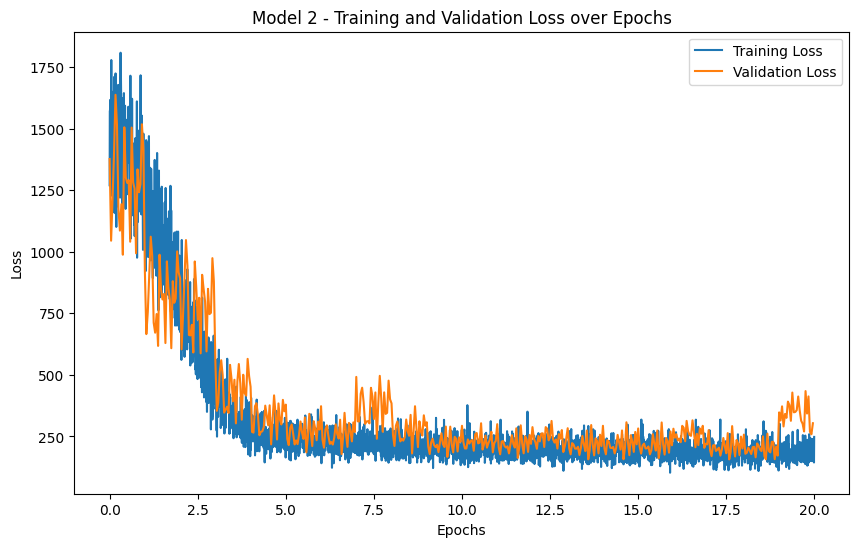

Final training loss: 248.1544647216797
Final validation loss: 303.7357482910156


In [15]:

len_train_loss = len(cnn_train_loss)
len_val_loss = len(cnn_val_loss)

train_iters_per_epoch = len_train_loss / epochs
val_iters_per_epoch = len_val_loss / epochs

# Creating x-axis values for training and validation so that they align with epochs
train_epochs = np.arange(0, epochs, 1 / train_iters_per_epoch)
val_epochs = np.arange(0, epochs, 1 / val_iters_per_epoch)

plt.figure(figsize=(10, 6))
plt.plot(train_epochs[:len_train_loss], cnn_train_loss, label='Training Loss')
plt.plot(val_epochs[:len_val_loss], cnn_val_loss, label='Validation Loss')
plt.title('Model 2 - Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('Final training loss:', cnn_train_loss[-1])
print('Final validation loss:', cnn_val_loss[-1])

#### True V.S. Predicted Graph (Per iteration)

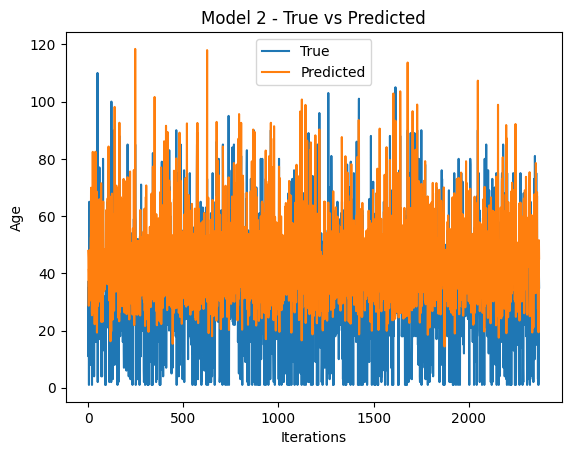

In [16]:
plt.figure(5)
plt.plot(actuals_cnn)
plt.plot(predictions_cnn)
plt.title('Model 2 - True vs Predicted')
plt.xlabel('Iterations')
plt.ylabel('Age')
plt.legend(['True', 'Predicted'])

#### Numerical Metric Evaluation Scores (MSE, RMSE, MAE, R^2)

In [17]:
predictions_cnn = np.array(predictions_cnn)
actuals_cnn = np.array(actuals_cnn)

mse_cnn = mean_squared_error(actuals_cnn, predictions_cnn)
rmse_cnn = np.sqrt(mse_cnn)
mae_cnn = mean_absolute_error(actuals_cnn, predictions_cnn)
r2_cnn = r2_score(actuals_cnn, predictions_cnn)

print(f'CNN MSE: {mse_cnn}')
print(f'CNN RMSE: {rmse_cnn}')
print(f'CNN MAE: {mae_cnn}')
print(f'CNN R-Squared: {r2_cnn}')

CNN MSE: 339.98260498046875
CNN RMSE: 18.438617706298828
CNN MAE: 14.841924667358398
CNN R-Squared: 0.1103652657637717


#### Residual Plot on test set

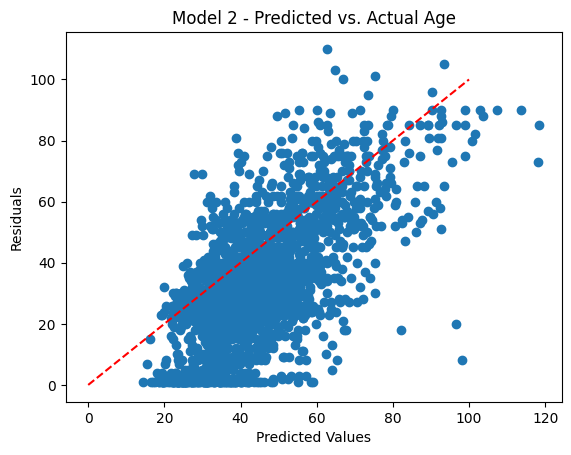

In [18]:
plt.figure(6)
plt.scatter(predictions_cnn, actuals_cnn)
plt.title('Model 2 - Predicted vs. Actual Age')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.show()

#### Residuals Histogram Plot

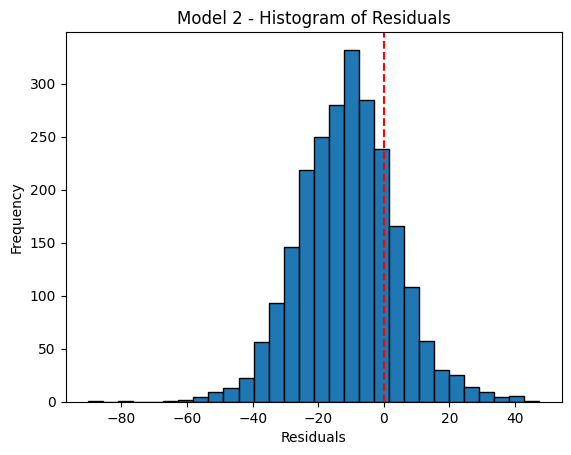

In [19]:
residuals = actuals_cnn - predictions_cnn

plt.figure(7)
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Model 2 - Histogram of Residuals')
plt.axvline(x=0, color='red', linestyle='--')  # Add a line at x=0 for reference
plt.show()

# Model 3 - Multi Modal Neural Network - Analysis

#### Load Model 3 Train and Test Loss Data

In [20]:
mmnn_train_loss = torch.load('tensor_collection\\mmnn_train_losses.pt')
mmnn_val_loss = torch.load('tensor_collection\\mmnn_val_losses.pt')

#### Load Test Set Data

In [21]:
directory = 'tensor_collection\\'
mmnn_x_test = pd.read_csv(directory + 'mmnn_x_test.csv')
mmnn_y_test_tensor = torch.load(directory + 'mmnn_y_test.pt')

print(type(mmnn_x_test))
print(type(mmnn_y_test_tensor))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


#### Load Trained Model 3 Into Notebook

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_numerical_features = mmnn_x_test.shape[1] - 1 # -1 because we don't count the filename column
model_mmnn = MultiModalNetwork(num_numerical_features).to(device)
model_mmnn, epochs = load_checkpoint('model_checkpoints\\mmnn_checkpoint_final.pth', model_mmnn)
batch_sz = 64

#### Setup Test Dataloader for MultiModal Neural Network

In [23]:
test_mmnn_dataloader = CustomDataloader(dataframe=mmnn_x_test, age=mmnn_y_test_tensor, batch_size=batch_sz, randomize=False)

#### Model Predict on Test set

In [24]:
model_mmnn.eval()  

predictions_mmnn = []
actuals_mmnn = []

predictions_mmnn, actuals_mmnn = mmnn_test_step(model_mmnn, test_mmnn_dataloader, device)


#### Plotting Training and Validation Loss (iterations)

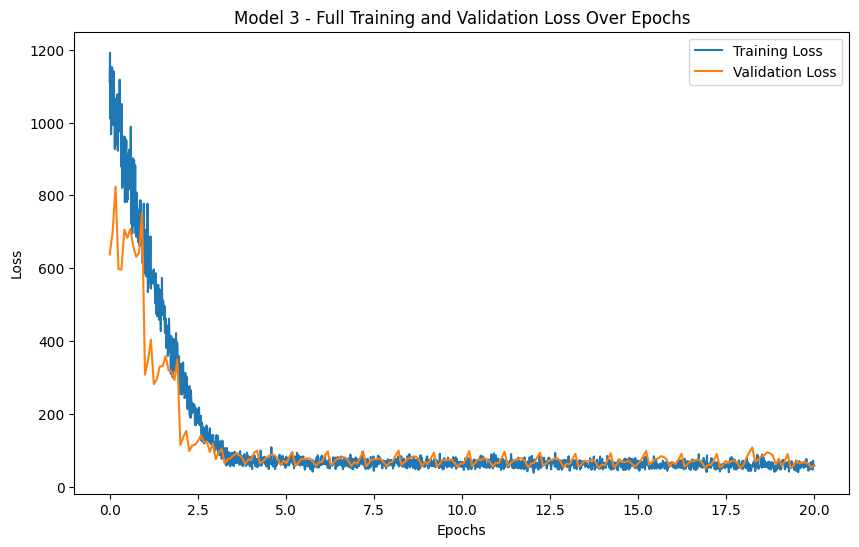

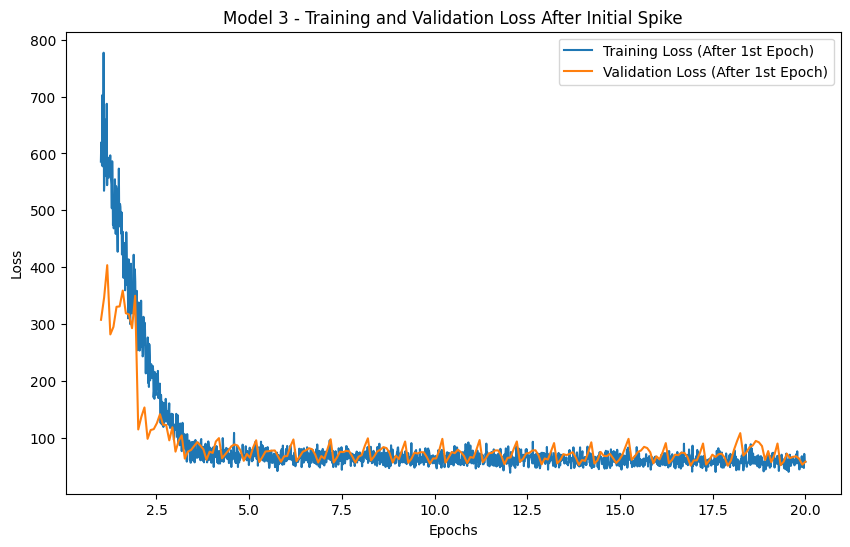

Final training loss: 57.542015075683594
Final validation loss: 58.02126693725586


In [25]:

train_iters_per_epoch = len(mmnn_train_loss) / epochs
val_iters_per_epoch = len(mmnn_val_loss) / epochs


train_epochs = np.linspace(0, epochs, len(mmnn_train_loss))
val_epochs = np.linspace(0, epochs, len(mmnn_val_loss))

# Plotting full loss history (Graph 1)
plt.figure(figsize=(10, 6))
plt.plot(train_epochs, mmnn_train_loss, label='Training Loss')
plt.plot(val_epochs, mmnn_val_loss, label='Validation Loss')
plt.title('Model 3 - Full Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting loss history excluding the first epoch (Graph 2)
start_idx_train = int(1*train_iters_per_epoch)  
start_idx_val = int(1*val_iters_per_epoch)  

plt.figure(figsize=(10, 6))
plt.plot(train_epochs[start_idx_train:], mmnn_train_loss[start_idx_train:], label='Training Loss (After 1st Epoch)')
plt.plot(val_epochs[start_idx_val:], mmnn_val_loss[start_idx_val:], label='Validation Loss (After 1st Epoch)')
plt.title('Model 3 - Training and Validation Loss After Initial Spike')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print final training and validation loss
print('Final training loss:', mmnn_train_loss[-1])
print('Final validation loss:', mmnn_val_loss[-1])

#### True V.S. Predicted Graph (Per iteration)

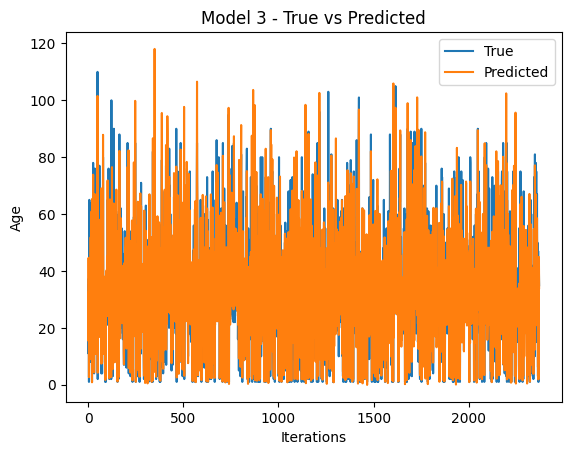

In [26]:
plt.figure(10)
plt.plot(actuals_mmnn)
plt.plot(predictions_mmnn)
plt.title('Model 3 - True vs Predicted')
plt.xlabel('Iterations')
plt.ylabel('Age')
plt.legend(['True', 'Predicted'])

In [27]:
#print the first 10 predictions
print('First 10 predictions:', predictions_mmnn[:10])
print('First 10 actuals:', actuals_mmnn[:10])

First 10 predictions: [32.279068, 15.489864, 44.597553, 19.706667, 2.6868305, 30.27597, 44.11561, 31.842754, 21.368828, 27.10193]
First 10 actuals: [37.0, 11.0, 35.0, 27.0, 1.0, 28.0, 65.0, 29.0, 24.0, 28.0]


#### Numerical Metric Evaluation Scores (MSE, RMSE, MAE, R^2)

In [28]:
predictions_mmnn = np.array(predictions_mmnn)
actuals_mmnn = np.array(actuals_mmnn)

mse_mmnn = mean_squared_error(actuals_mmnn, predictions_mmnn)
rmse_mmnn = np.sqrt(mse_mmnn)
mae_mmnn = mean_absolute_error(actuals_mmnn, predictions_mmnn)
r2_mmnn = r2_score(actuals_mmnn, predictions_mmnn)

print(f'Multi Modal Network MSE: {mse_mmnn}')
print(f'Multi Modal Network RMSE: {rmse_mmnn}')
print(f'Multi Modal Network MAE: {mae_mmnn}')
print(f'Multi Modal Network R-Squared: {r2_mmnn}')

Multi Modal Network MSE: 56.39138412475586
Multi Modal Network RMSE: 7.509419918060303
Multi Modal Network MAE: 5.51691198348999
Multi Modal Network R-Squared: 0.8524402978881356


#### Residual Plot on test set

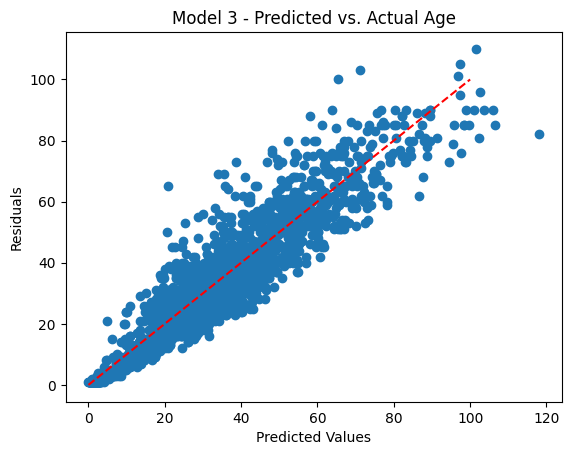

In [29]:
plt.figure(11)
plt.scatter(predictions_mmnn, actuals_mmnn)
plt.title('Model 3 - Predicted vs. Actual Age')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.show()


#### Residuals Histogram Plot

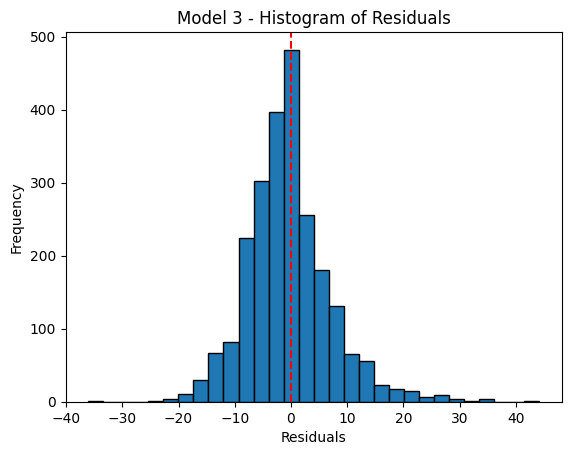

In [30]:
residuals = actuals_mmnn - predictions_mmnn

plt.figure(12)
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Model 3 - Histogram of Residuals')
plt.axvline(x=0, color='red', linestyle='--')  # Add a line at x=0 for reference
plt.show()

# Random baseline Data


In [40]:
#take the average of actuals_mmnn and store it in a variable
average_pred = np.mean(actuals_mmnn)
baseline_pred = [average_pred] * len(actuals_mmnn)
baseline_test = actuals_mmnn




In [41]:

predictions = np.array(average_pred)
actuals = np.array(baseline_test)

mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'Baseline Regression MSE: {mse}')
print(f'Baseline Regression RMSE: {rmse}')
print(f'Baseline Regression MAE: {mae}')
print(f'Baseline Regression R-Squared: {r2}')


Baseline Regression MSE: 72.65914529297598
Baseline Regression RMSE: 8.524033393469079
Baseline Regression MAE: 6.362054293401746
Baseline Regression R-Squared: 0.8098723245291708
